<a href="https://colab.research.google.com/github/Hemanthjkumar/EDA-DA/blob/main/EDA_MOD_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Constructing a linear regression model

In [1]:

# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

In [8]:
# loading the data
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/HepatitisCdata.csv'
df = pd.read_csv(url)

In [9]:
print(df.keys())

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [10]:
#Now that our data is loaded, let's get our DataFrame ready quickly and work ahead:
df.head()
# print the columns present in the dataset
print(df.columns)
# print the top 5 rows in the dataset
print(df.head())


Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


In [11]:
#In the new overall dataframe, let's check if we have any missing values:
df.isna().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


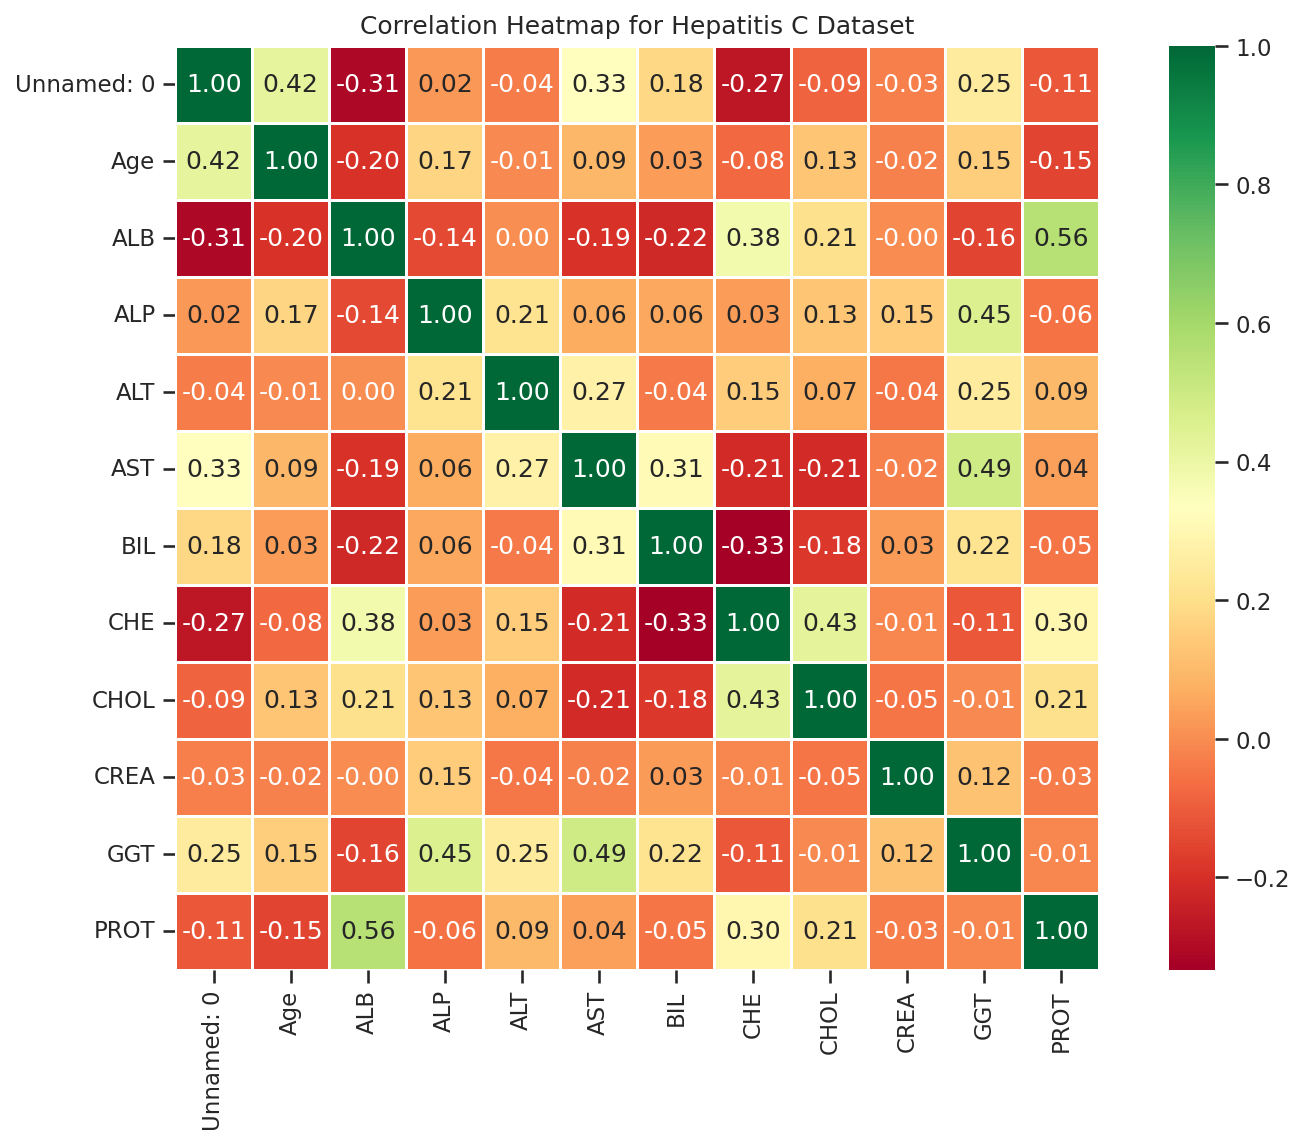

In [13]:
# Compute correlation only for numeric columns
numeric_data = df.select_dtypes(include='number')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='RdYlGn', square=True, linewidths=0.5)
plt.title("Correlation Heatmap for Hepatitis C Dataset")
plt.show()

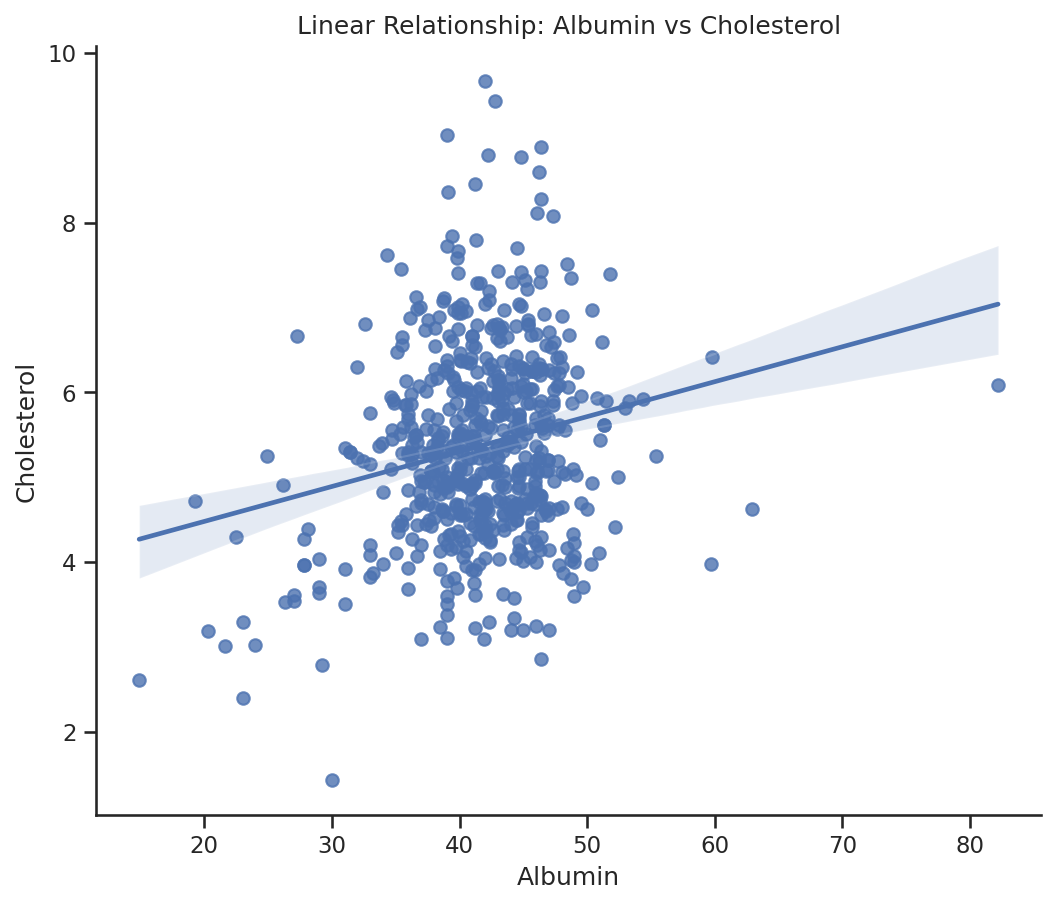

In [14]:
# Regression plot between Albumin and Cholesterol
sns.lmplot(x='ALB', y='CHOL', data=data, height=6, aspect=1.2)
plt.title('Linear Relationship: Albumin vs Cholesterol')
plt.xlabel('Albumin')
plt.ylabel('Cholesterol')
plt.show()

In [16]:
#Scikit-learn needs to create features and target variables in arrays, so be careful when assigning columns to X and y:
# Preparing the data
X = df[['ALB']]       # Feature: Albumin
y = df[['CHOL']]      # Target: Cholesterol

In [17]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [19]:
# Combine X and y for easier NaN removal
combined = pd.concat([X, y], axis=1)

# Drop rows with NaNs in either column
combined_clean = combined.dropna()

# Split cleaned data back into X and y
X_clean = combined_clean[['ALB']]
y_clean = combined_clean[['CHOL']]

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [20]:
#Model evaluation
#R^2 can be determined using our test dataset in the LinearRegression.score() method:
#check prediction score/accuracy
regressor.score(X_test, y_test)

0.0433254782870891

In [21]:
#Before that, let's predict the y values with our model and evaluate it more. And a target variables DataFrame is also built:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,5.30,5.208803
1,6.18,5.276698
2,4.74,5.382783
3,5.46,5.225776
4,5.07,5.408244
5,3.29,4.576533
6,3.57,5.480382
7,6.65,5.106961
8,7.41,5.293671
9,4.85,5.128178


<Axes: >

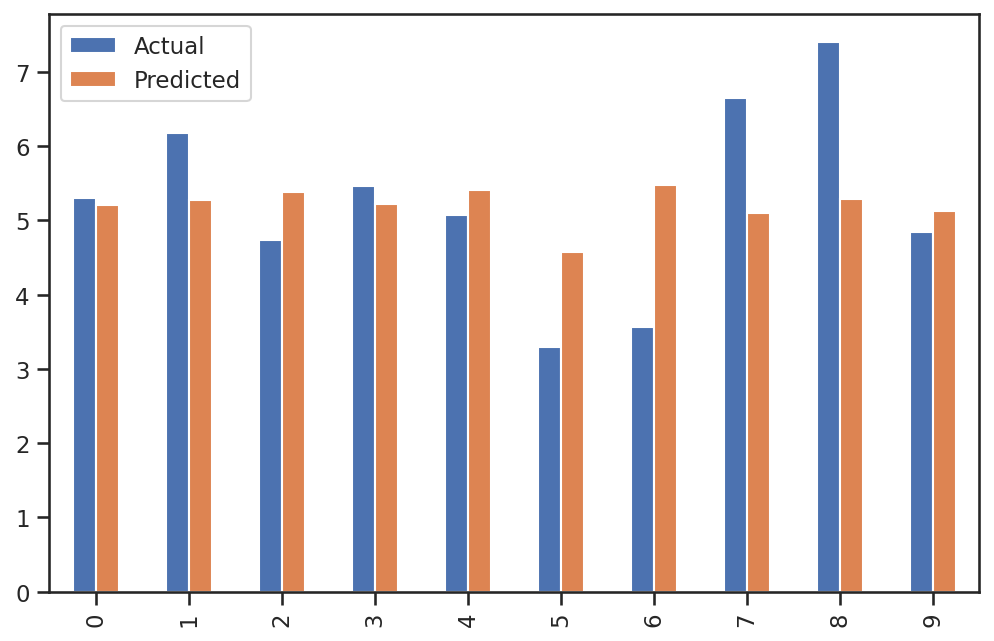

In [22]:
#The preceding screenshot shows the difference between the actual values and the predicted values. We can see them if we plot them:
evaluate.head(10).plot(kind = 'bar')

In [23]:
#Computing accuracy
# Scoring the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Absolute Error (MAE)
print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.0433254782870891
MAE score: 0.829454375009923
MSE score: 1.07163998280154
